In [3]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [31]:
abalone = pd.read_csv("orders.csv")

In [32]:
abalone.head()

,id,shop_id,tracking_number,customer_id,order_date,customer_contact,status,billing_address,delivery_type,order_by,...,delivery_time,shipping_address,coupon_id,logistics_provider,note,deleted_at,created_at,updated_at,created_by,updated_by
0,1,36,1.092022e+12,103695,2022-09-01 10:25:30,01674697230,7,"{""name"":""Md Sofiqul Islam"",""email"":""Sayensumon...",Self Collection,'''customer''',...,Morning,"{""name"":""Md Sofiqul Islam"",""email"":""Sayensumon...",NaN,NaN,NaN,NaN,2022-09-01 10:25:30,2022-10-11 11:48:03,NaN,3.0
1,2,51,1.092022e+12,187206,2022-09-01 10:55:36,01538329637,7,"{""name"":""Mr. Sojib"",""email"":""sojib001@gmail.co...",Self Collection,'''customer''',...,Afternoon,"{""name"":""Mr. Sojib"",""email"":""sojib001@gmail.co...",NaN,NaN,Payment Timeout,NaN,2022-09-01 10:55:36,2022-09-07 15:01:18,NaN,NaN
2,3,87,1.092022e+12,213740,2022-09-01 12:25:00,01718787360,7,"{""name"":""Provost, Shahid Ziaur Rahman Hall, RU...",Self Collection,'''customer''',...,Morning,"{""name"":""Provost, Shahid Ziaur Rahman Hall, RU...",NaN,NaN,Payment Timeout,NaN,2022-09-01 12:25:00,2022-09-07 15:01:18,NaN,NaN
3,4,58,1.092022e+12,213741,2022-09-01 12:25:00,01723457643,6,NaN,Self Collection,admin,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 12:25:00,2022-09-07 12:45:52,NaN,NaN
4,5,96,1.092022e+12,213743,2022-09-01 12:32:44,01713750354,5,NaN,Self Collection,admin,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 12:32:44,2022-09-07 12:45:52,NaN,NaN


In [33]:
abalone.describe()

,id,shop_id,tracking_number,customer_id,status,parent_id,sales_tax,amount,discount,total,delivery_fee,paid_total,payment_id,coupon_id,logistics_provider,deleted_at,created_by,updated_by
count,4776.000000,4776.000000,4.496000e+03,4776.000000,4776.000000,0.0,4224.0,4.776000e+03,4224.000000,4.776000e+03,4774.0,4.776000e+03,3933.000000,0.0,0.0,0.0,3557.000000,122.0
mean,2390.018007,46.544389,1.364314e+13,185802.502722,5.667295,NaN,0.0,5.922300e+04,14621.912760,4.633463e+04,0.0,4.633463e+04,2165.248919,NaN,NaN,NaN,168494.517290,3.0
std,1379.392099,28.673013,8.052818e+12,53796.042560,0.795581,NaN,0.0,8.711050e+04,25615.587585,7.554027e+04,0.0,7.554027e+04,1136.981794,NaN,NaN,NaN,73205.661315,0.0
min,1.000000,1.000000,1.011970e+12,51.000000,0.000000,NaN,0.0,0.000000e+00,-310100.000000,0.000000e+00,0.0,0.000000e+00,5.000000,NaN,NaN,NaN,3.000000,3.0
25%,1195.750000,22.000000,9.092022e+12,186603.000000,5.000000,NaN,0.0,1.790000e+04,447.000000,1.290000e+04,0.0,1.290000e+04,1181.000000,NaN,NaN,NaN,114870.000000,3.0
50%,2390.500000,45.000000,1.211202e+13,214434.500000,5.000000,NaN,0.0,3.690000e+04,4000.000000,3.290000e+04,0.0,3.290000e+04,2166.000000,NaN,NaN,NaN,214770.000000,3.0
75%,3584.250000,71.000000,1.809202e+13,215704.250000,6.000000,NaN,0.0,7.590000e+04,13000.000000,5.391400e+04,0.0,5.391400e+04,3149.000000,NaN,NaN,NaN,215899.000000,3.0
max,4778.000000,99.000000,3.110202e+13,216983.000000,7.000000,NaN,0.0,3.144900e+06,286000.000000,3.144900e+06,0.0,3.144900e+06,4133.000000,NaN,NaN,NaN,216983.000000,3.0


In [34]:
abalone.describe(include=[object])

,order_date,customer_contact,billing_address,delivery_type,order_by,payment_status,payment_gateway,delivery_time,shipping_address,note,created_at,updated_at
count,4776,4776,3372,4776,4776,4776,4776,4223,4554,887,4776,4776
unique,4748,2926,2102,2,3,3,3,3,2894,5,4746,4153
top,2022-09-06 14:56:55,01518492876,"{""name"":""hasanur"",""email"":null,""mobile"":""01518...",Self Collection,customer,Paid,PAYMENT_AT_SHOWROOM,Morning,"{""name"":""hasanur"",""email"":null,""mobile"":""01518...",Because this order has expired,2022-09-06 14:56:55,2022-09-07 12:45:49
freq,4,44,35,4580,3746,2573,2791,2167,35,405,4,60


In [35]:
abalone.isna().sum()

id                       0
shop_id                  0
tracking_number        280
customer_id              0
order_date               0
customer_contact         0
status                   0
billing_address       1404
delivery_type            0
order_by                 0
parent_id             4776
sales_tax              552
amount                   0
discount               552
total                    0
delivery_fee             2
paid_total               0
payment_id             843
payment_status           0
payment_gateway          0
delivery_time          553
shipping_address       222
coupon_id             4776
logistics_provider    4776
note                  3889
deleted_at            4776
created_at               0
updated_at               0
created_by            1219
updated_by            4654
dtype: int64

<AxesSubplot: >

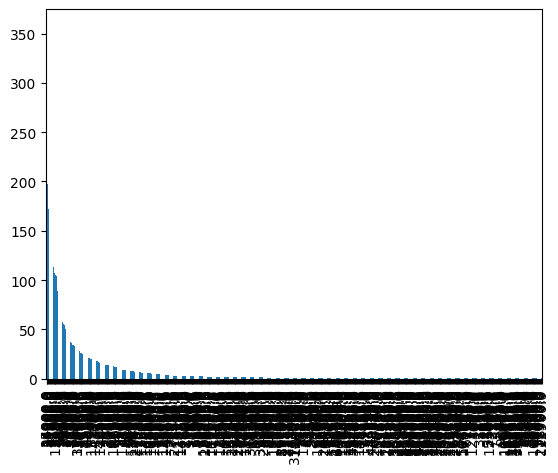

In [36]:
abalone.total.value_counts().plot(kind= 'bar')

<AxesSubplot: >

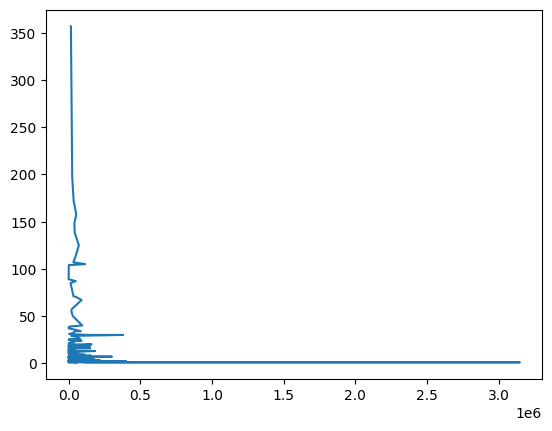

In [38]:
abalone.total.value_counts().plot()

<AxesSubplot: >

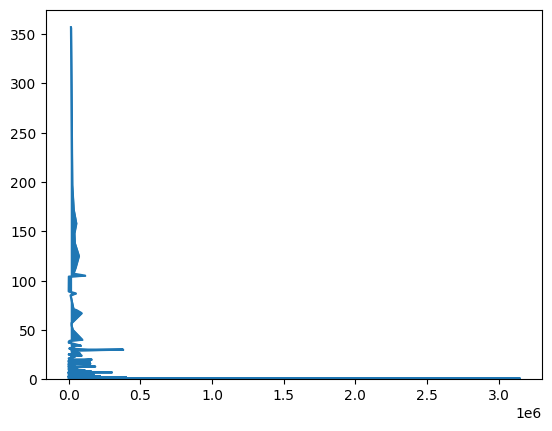

In [39]:
abalone.total.value_counts().plot(kind = 'area')

<AxesSubplot: xlabel='total', ylabel='count'>

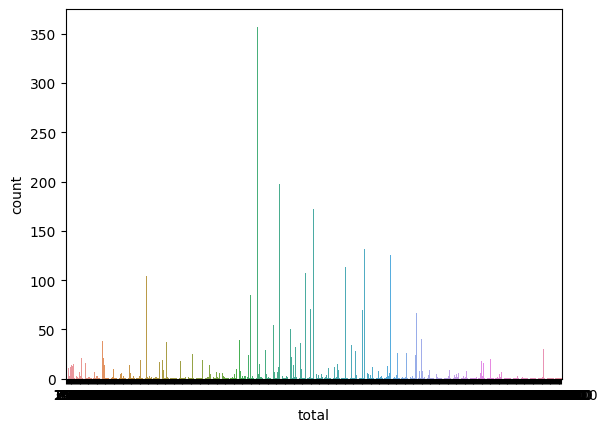

In [40]:
sns.countplot(x ='total', data = abalone)

<AxesSubplot: ylabel='total'>

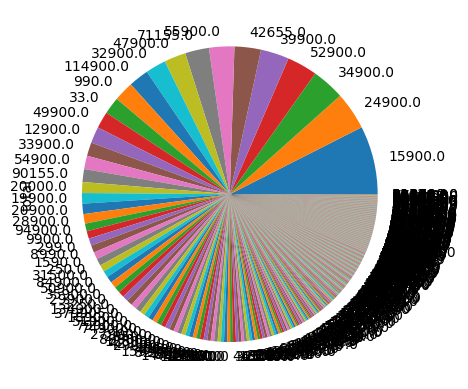

In [41]:
abalone.total.value_counts().plot(kind = 'pie')